In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

class GPLVM:
  def __init__(self, latend_dim ):
    self.latent_dim = latend_dim
    self.alpha = 1.0
    self.beta = 10.0
  
  def k(self, xi, xj):
    return 1.0 * np.exp(-0.5 * 1.0 * np.sum((xi - xj) * (xi - xj), 2)) 

  def cov(self, xi, xj, dim ):
    a = np.tile( xi.reshape(-1,1,dim), (1, len(xj), 1) )
    b = np.tile( xj.reshape(1,-1,dim), (len(xi), 1, 1) )
    return self.k(a,b)

  def learn(self, x, num_itr, step=0.1, greedy=False, z=None):
    N = len(x)
    self.x = x
    liks = []

    # 初期化
    if z is None:
      z = np.zeros( (N, self.latent_dim) )

    plt.plot( z[:,0], z[:,1], "o" )
    plt.show()

    for itr in range(num_itr):
      for i in range(N):
        # 現在の値で尤度計算
        old_z = z[i].copy()
        old_lik = self.calc_loglik( x, z )

        # 新たなzで尤度を計算
        new_z = z[i] + np.random.randn(self.latent_dim) * step
        z[i,:] = new_z
        new_lik = self.calc_loglik( x, z )

        # サンプリング
        r = np.exp(new_lik-old_lik) 
        th = 1 if greedy else random.random()
        if r>th:
          # accept: 新たなzを採用
          pass
        else:
          # reject: 古いzに戻す
          z[i,:] = old_z

    
      if itr%10==0:
        lik = self.calc_loglik( x, z )
        print(lik)
        plt.plot( z[:,0], z[:,1], "o" )
        plt.show()

    return z

  def calc_loglik(self, x, z ):
    N = len(x)
    D = len(x[0])
    K = self.alpha * self.cov(z, z, self.latent_dim) + 1/self.beta * np.eye(N, N)
    K_inv = np.linalg.inv( K )

    return -D/2*np.log( np.linalg.det(K) ) -1/2 * np.trace( K_inv@x@x.T )
    

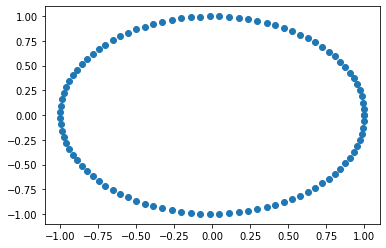

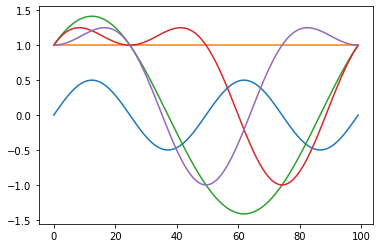

In [2]:
N = 100
D = 5

# 真の潜在変数を生成
t = np.linspace( 0, 2*np.pi, N )
z_true = np.zeros( (N, 2)  )

z_true[:,0] = np.cos(t)
z_true[:,1] = np.sin(t)

plt.plot( z_true[:,0], z_true[:,1], "o" )

# 潜在変数を適当に高次限化
x = np.zeros( (N, D) )
x[:,0] = [ z1*z2 for (z1,z2) in z_true ] 
x[:,1] = [ z1*z1+z2*z2 for (z1,z2) in z_true ] 
x[:,2] = [ z1 + z2 for (z1,z2) in z_true ] 
x[:,3] = [ z1*z1+z2 for (z1,z2) in z_true ] 
x[:,4] = [ z2*z2+z1 for (z1,z2) in z_true ] 

plt.figure()
for i in range(D):
  plt.plot( range(N), x[:,i])


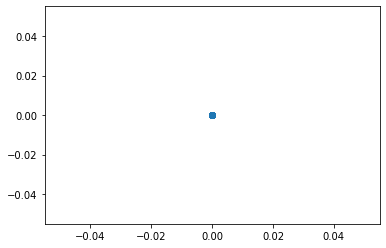

-621.4362363344319


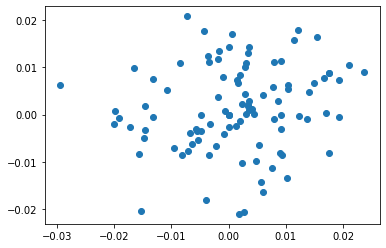

-388.5838367181084


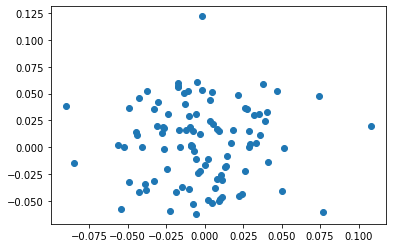

-78.61528164421634


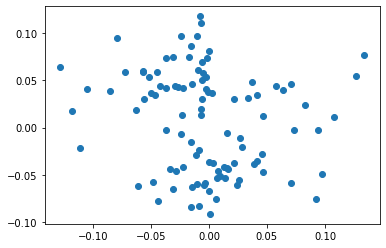

45.912335218699525


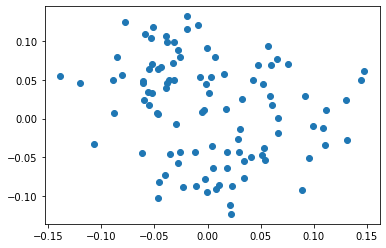

142.7528597070695


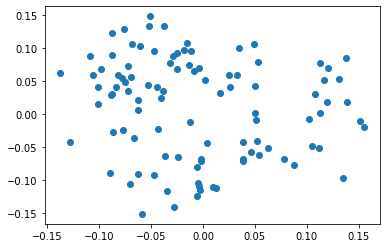

208.75446637181898


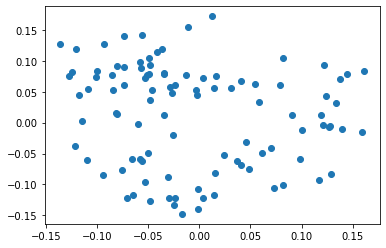

236.91941951037313


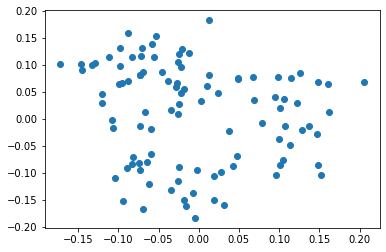

252.11074901853686


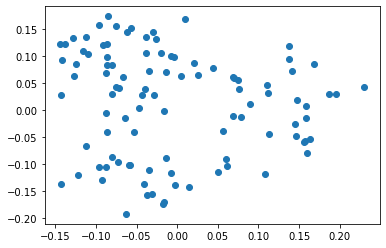

275.3205682481033


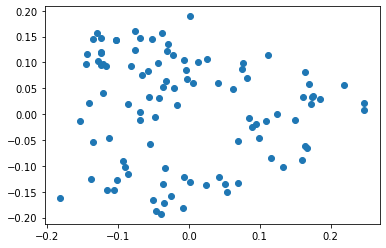

282.07696509184774


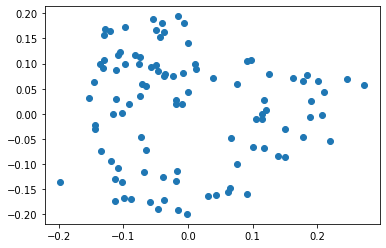

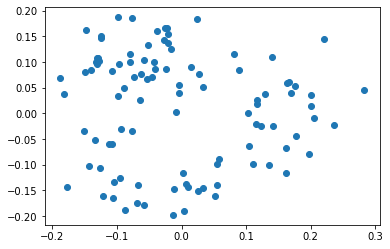

306.9012538187962


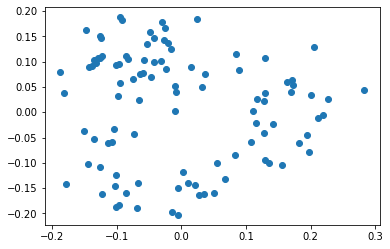

377.78206823699674


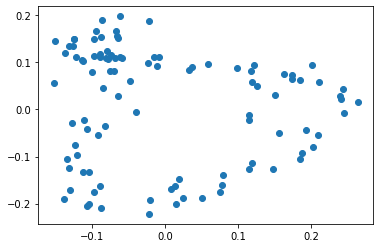

414.53321190094755


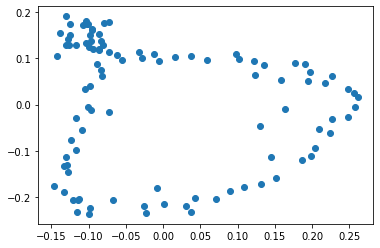

432.72251042117944


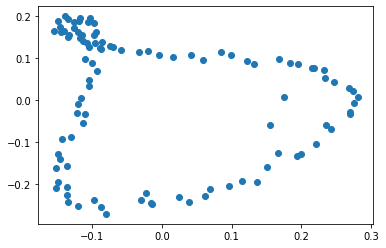

444.5449878049079


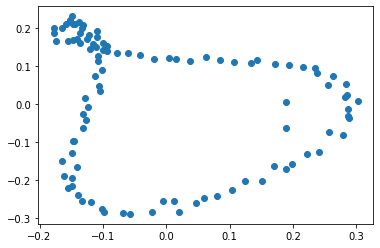

455.22055246403283


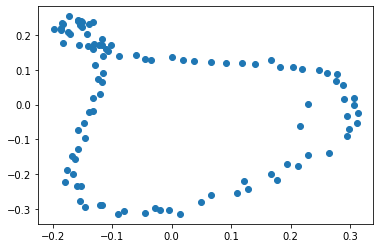

465.0268689346225


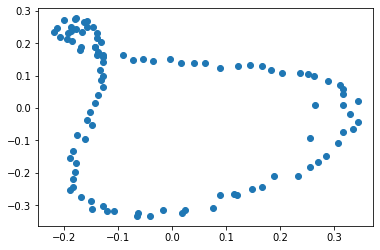

473.1686978519824


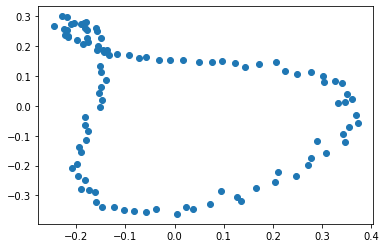

479.9184772567717


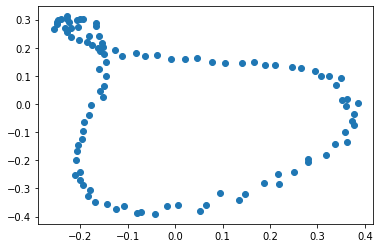

485.6433528202175


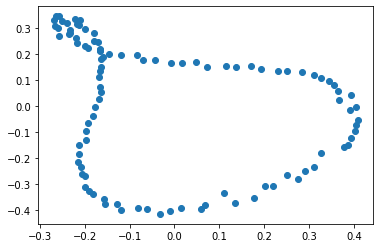

In [3]:
gp = GPLVM(2)
z = gp.learn(x, 100, 0.01, greedy=False)
z = gp.learn(x, 100, 0.01, greedy=True, z=z)